# I- General presentation of the SCRIB-AI project

Scrib-AI is a student project that aims to summarize texts in an abstract way. This jupyter is there to explain our technical, theoretical and ideological approach. You can test this algorithm directly on our site: http://vps528736.ovh.net/ and the code is in opensource on github https://github.com/AdriBenben/Scrib-AI-model-pytorch (for the python code) and https://github.com/AdriBenben/Scrib-AI (for the website) 

## A) Abstract summary text

### 1/ Postion of the problem

The Internet, combined with the dictatorship of the smartphone, brings a lot of information at our fingertips. Our lives are transformed and we are caught between an overwhelming overload of information and an unsustainable lightness of access. In this context, an algorithm capable of finding essential information in a long text or corpus, would allow many applications. For example, the possibility of summarizing long articles or books quickly can interest the journalistic world. Being able to summarize would lead to being able to compare texts with each other: list the common points and underline the differences. This seems to us to be very useful for technology veiles in science and medicine. The same goes of course for the law (I let your imagination take over for applications in this field).


There are two types of summaries: extractive (highlighter type) or abstract (pen type). The first category is simpler: the model only has to "choose" the information and organize it. But this has its limits. I like bcp the example of See in her blog http://www.abigailsee.com/2017/04/16/taming-rnns-for-better-summarization.html where she takes up the main ideas of the publication *See, Abigail, Peter J. Liu, and Christopher D. Manning. "Get to the point: Summarization with pointer-generator networks." arXiv preprint arXiv:1704.04368 (2017)*. She takes the example of a text written in the first person (ex: Robinson Crusoe or the wild life). Well, an extractive text would summarize this work in the first person, as if the algorithm were Robinson. There is no "abstract work", no reformulation (even if you see, it's quite overrated here). 

As she says very well in her blog: **The issue of the abstract is more important even if harder.** 


### 2/ Issues and state of the art early 2018 

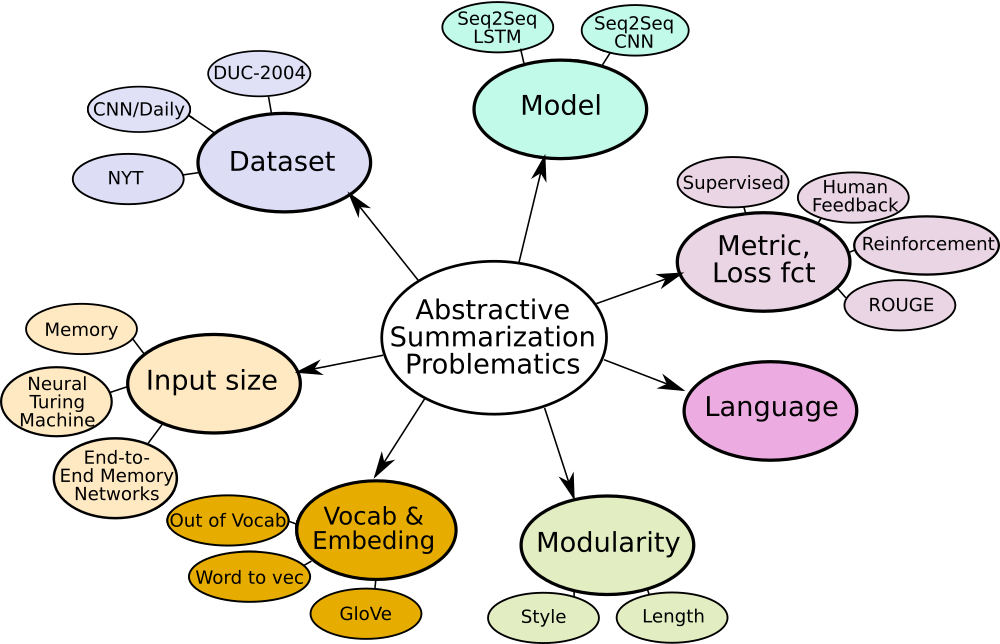

In [5]:
from IPython.display import Image
Image('pictures_presentations/test.png')

A lot of direct or indirect research are done in the field of text summary. We could start this state of the art in the 90s but we will not because it will not be useful to understand the rest. If you are interested, generally the publications we are going to quote about it, you can refer to it. 

First of all, it must be understood that the situation of summary is quite close to that of translation. And so the great breakthrougs thanks to deep learning in the field of machine translation (MTN) have a direct impact on the results of text summaries. As far as, generally, a new architecture that breaks through in NMT is almost inevitably tested for summary (example 1: *Gehring, Jonas, et al. "Convolutional sequence to sequence learning."). arXiv preprint arXiv:1705.03122 (2017)*. Github link: https://github.com/facebookresearch/fairseq-py) or a summary publication follows (example 2 *Gulcehre, Caglar, et al. "Pointing the unknown words." arXiv preprint arXiv:1603.08148 (2016)."Abstractive text summarization using sequence-to-sequence rnns and beyond." arXiv preprint arXiv:1602.06023 (2016).with authors in common). We can therefore follow the history of the two in parallel.





The best architecture of the moment is still the Encoder-Decoder/Sequence to Sequence/Seq2Seq model (*Sutskever, Ilya, Oriol Vinyals, and Quoc V. Le. "Sequence to sequence learning with neural networks." Advances in neural information processing systems. 2014.*3500 citations in 3 years on GS). The "reader" part of the model (the encoder) will read the text in both directions. Then the decoder, the writer, will take his pen and generate one word after another the summary / traduction among his list of vocabulary words. It can be based on two types of cells: recurrent types LSTM/GRU or CNN. Which one is better? We debate it a little later, but it's a fight. There have been very nice improvements to this vanilla model and especially the attention mechanisms (*Bahdanau, Dzmitry, Kyunghyun Cho, and Yoshua Bengio. "Neural machine translation by jointly learning to align and translate." arXiv preprint arXiv:1409.0473 (2014)*.3000 citations on GS), copying mechanisms (*Luong, Minh-Thang, et al. "Addressing the rare word problem in neural machine translation." arXiv preprint arXiv:1410.8206 (2014).*). We will go into more detail in paragraph Sequence to Sequence


The datasets are: DUC-2003, DUC-2004 (https://duc.nist.gov/duc2004/), Gigaword (https://catalog.ldc.upenn.edu/ldc2003t05), CNN-Dailymail (https://cs.nyu.edu/~kcho/DMQA/), New York Times (https://catalog.ldc.upenn.edu/ldc2008t19). All these datasets are in English and therefore the model works for English texts. Generally publications compare their results on Gigawords but since 2016, it seems that we now compare the results mainly on CNN-dailymail and on rare time, on NYT. In the CNN-Daily corpus, the texts and abstracts are longer (about 2000 tokens for the articles and 100 tokens for the abstracts). Here we feel coming a new issue : that of the size of the input. Are we allow your user to set the size of the input he wants? Sounds like the best. But it's at the risk that, when your Version 1 is ready and you make tested by your roommate, he puts the bible in it (that prick!) and trashes your algo 2 hours after putting it online. True Story. And then it's closely linked to the type of cells you choose (CNN or RNN). So the idea of modularity and the freedoms that we give to users emerges. How to take in count user wishes such style, length, and the wish to insist more on one point than another. The publication *Fan, Angela, David Grangier, and Michael Auli. "Controllable Abstractive Summarization." arXiv preprint arXiv:1711.05217 (2017)*.has notably taken this position which did not seem silly to us at all. The idea being to add "user will proof tokens" in the model input. And for the more imaginative people, you can have fun varying the nature of the input model videos, sounds etc....

But how do can we rate a summary  ? This question has been at the heart of our concerns and we have tried to give a personal answer (next paragraph). But first, the state of the art. The metric used is the ROUGE metric (*Lin, Chin-Yew. "Red: A package for automatic evaluation of summaries." Text Summarization Branches Out (2004).* 2500 quotations on GS), coded on the same principle as BLEU. For the learning, it is about a banal supervised type one compares the output with the target (the summary of the BDD). However, in the publication of *Paulus, Romain, Caiming Xiong, and Richard Socher. "A deep reinforced model for abstractive summarization." arXiv preprint arXiv:1705.04304 (2017).*, the learning method is reinforcement learning. It is a little more subtle than that and see the publication for more details. Today they get the best results and it will be our flagship publication for our model.

 
Last papers on abstractive text summarization are : 

Chopra, Sumit, Michael Auli, and Alexander M. Rush. "Abstractive sentence summarization with attentive recurrent neural networks." Proceedings of the 2016 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies. 2016.
+ paper : http://www.aclweb.org/anthology/N16-1012
+ github : https://github.com/facebookarchive/NAMAS


Nallapati, Ramesh, et al. "Abstractive text summarization using sequence-to-sequence rnns and beyond." arXiv preprint arXiv:1602.06023 (2016).
+ paper: https://arxiv.org/pdf/1602.06023.pdf


See, Abigail, Peter J. Liu, and Christopher D. Manning. "Get to the point: Summarization with pointer-generator networks." arXiv preprint arXiv:1704.04368 (2017).
+ paper: https://arxiv.org/pdf/1704.04368.pdf
+ blog : http://www.abigailsee.com/2017/04/16/taming-rnns-for-better-summarization.html
+ github : https://github.com/abisee/pointer-generator


Dohare, Shibhansh, and Harish Karnick. "Text Summarization using Abstract Meaning Representation." arXiv preprint arXiv:1706.01678 (2017).
+ paper: https://arxiv.org/pdf/1706.01678.pdf


Paulus, Romain, Caiming Xiong, and Richard Socher. "A deep reinforced model for abstractive summarization." arXiv preprint arXiv:1705.04304 (2017).
+ paper: https://arxiv.org/pdf/1705.04304.pdf
+ blog : https://www.salesforce.com/products/einstein/ai-research/tl-dr-reinforced-model-abstractive-summarization/


Fan, Angela, David Grangier, and Michael Auli. "Controllable Abstractive Summarization." arXiv preprint arXiv:1711.05217 (2017).
+ paper: https://arxiv.org/pdf/1711.05217.pdf


Liu, Peter J., et al. "Generating Wikipedia by Summarizing Long Sequences." arXiv preprint arXiv:1801.10198 (2018).
+ paper: https://arxiv.org/pdf/1801.10198.pdf

Weber, Noah, et al. "Controlling Decoding for More Abstractive Summaries with Copy-Based Networks." arXiv preprint arXiv:1803.07038 (2018).
+ paper: https://arxiv.org/pdf/1803.07038.pdf





In these papers, we can find the following issues: 
+ Repetitions of generation text and content
+ Information pitfalls
+ Out Of Vocabulary dilemna 
+ Train time
+ Modularities
+ The ROUGE standard Norm that reaches its limits
+ Initial embedding
+ Issue of long text and that the algorithm "forget" the beggining.  




## B) Our approach: how to qualify the quality of an abstract?

We looked at the problem of the norm. Indeed, how to quantify the quality of an abstract? There is the ROUGE metric, but as saleforce has indicated at the end of their publication, when the value of ROUGE is high(40pts) the correct language syntax tends to deseapear. So if we have maximized it, it quickly becomes incomplete. Moreover it seemed to us that ideologically, comparing 1 summary to a preference is not for the best. This is not flexible. Benjamin and I can write each one 1 summary, very different one and both very good. But yet, with this method of learning, 1 will be discriminated in front of the other. Finally to qualify a summary is a relatively simple task for human but very hard for a machine.






Following the Two Minutes Papers channel (https://www.youtube.com/channel/UCbfYPyITQ-7l4upoX8nvctg), we discovered this publication, which is a team effort between OpenAI and DeepMind: *Christiano, Paul F., et al. "Deep reinforcement learning from human preferences." Advances in Neural Information Processing Systems. 2017.* blog : https://blog.openai.com/deep-reinforcement-learning-from-human-preferences/. The general idea is to apply a reeinforcement learning algorithm on simple problems like Ataries games or a knacky that makes back flip. Unless, here it is not the environment that gives the reward but the user, the man in front of the screen. We see it very well in this little video

[Lien vers une démonstration](https://youtu.be/oC7Cw3fu3gU)

In [7]:
with open('pictures_presentations/humanfeedbackjump.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


But how does this jumping sausage fit the pb of the text summary?! The clue for us was the description of the problem in the publication: in fact, a backflip jump is easy to evaluate but difficult to specify. So is the summary. Hence the link and the idea of

**CREATE A PERSONAL TEXT SUMMARY STANDARD BASED ON HUMAN FEEDBACK. **

**Another way to appreciate our project would be to see it as an extrapolation from publication to more complex problems like text summary. It's a scaling up.**

This approach has multiple advantages. Thanks to human feedback, the standards will have a notion of what is more syntactically correct (failing ROUGE as can be seen in the Saleforces publication). It also responds to the modularity properties. Indeed, two people can have "different standards" since they have led it in different ways and therefore get at the end summaries closer to their will. Thus, it also responds to the two fundamental (and paradoxical) properties of summaries: it allowed two people with different norms to have different summaries but both good, (or even drown in the same way). 

The drawback to this is training time quite obviously. That's why we tried to minimize the number of weights to train! Thanks to the indications of the publication and an evaluation of our number of weights to train. 
*"4 frames, convolutional layers of size 7x7, 5x5, 3x3, and 3x3 each having 16 filters, [...] fully connected layer of size 64 and then a scalar output ".*
Assuming that they use Conv3D one obtains: 10400 parameters (cf following cell calculation), that they managed to train in 5500 bits (that means choice right left), labeled in 5h30. Then their total model in 15 days by train. 

In view of our architecture, we hope to have only 3100 articles to label before obtaining correct summaries.

In [2]:
parameters_ref = 7*7*7*4*16+5*5*5*16*16+3*3*3*16*16+3*3*3*16*16+64
print(str(parameters_ref)+' parameters for 5500 bits')

article_max_size=2000
hidden_size=300
T, H = floor((article_max_size - 10)/4 + 1), floor((2*hidden_size - 10)/4 + 1)
T, H = floor((T - 2)/2 + 1), floor((H - 2)/2 + 1)
T, H = floor((T-7)/3 + 1), floor((H-7)/3 + 1)
T, H = floor((T-2)/2 + 1), floor((T-2)/2 + 1)
T, H = floor((T-5)/2 + 1), floor((H-5)/2 + 1)
T, H = floor((T-2)/2 + 1), floor((T-2)/2 + 1)
parameters_train=8*50*(H)*(T)+50+10*10*1*8+7*7*8*8+5*5*8*8
bits_train=(5500/parameters_ref)*parameters_train
print(str(int(parameters_train))+' parameters for '+str(int(bits_train))+' bits')
print('Factors : '+str((bits_train/float(5500))))


67840 parameters for 5500 bits


NameError: name 'floor' is not defined

## C) What you can find in this project

This project is coded in pytorch version 0.3.0 and runs on GPUs. Depency of nltk.tokenize

This project has for aim :

  1- To reproduce the Seq2seq model of the SaleForces publication, without the reinforcement part.
  
  2- To create a template called "Reward" to score the summary from the feedbacks.
  
  3- To subtrain these two models independently. The first on CNN-Daily and the second with the red metric on the summaries generated by Seq2Seq.
  
  4- Connect the two models and continue learning with the left and right human labeling by connecting it to the interface.
  
  5- To be able to evaluate it
  
  6- To explain our approach.
  
  
At the end of this project, our model will be able to: put a note to articles and summarize articles according to this standard

We tried to put all the references we used -papers, blogs, videos. We will also write this jupyter in French. It is then up to you to translate it into your language.






---





# II- General Configuration

In [0]:
config = {
  "url": "http://vps528736.ovh.net",
  "port": 80,
  "auth": {
    "name": "wookie_drive",
    "password": "5Jhs856Ljhs5S"
  },
  "models": {
    "name": "onmt",
    "vocabulary": {
      "input": 5000,
      "output": 5000
    },
    "summary": {
      "batch_size": 5,
      "input_size": 300,
      "hidden_size": 100,
      "output_size": 300,
      "dropout": 0.05,
      "encoder": {
        "num_layers": 2,
        "bidirectional": True
      },
      "decoder": {
        "num_layers": 2,
        "bidirectional": True
      }
    },
    "metric": {
      "input_size": 1000,
      "hidden_size": 500
    }
  }
}

In [0]:
from utils import ScribAPI, ScribDataset

In [0]:
scribAPI = ScribAPI().load_config(config)
cnn_dataset = ScribDataset(scribAPI, 'cnn-daily')



---



# III- Prétraitement des données

## A) Présentation des données

We used CNN-Daily

Initialization of embedding with Glove



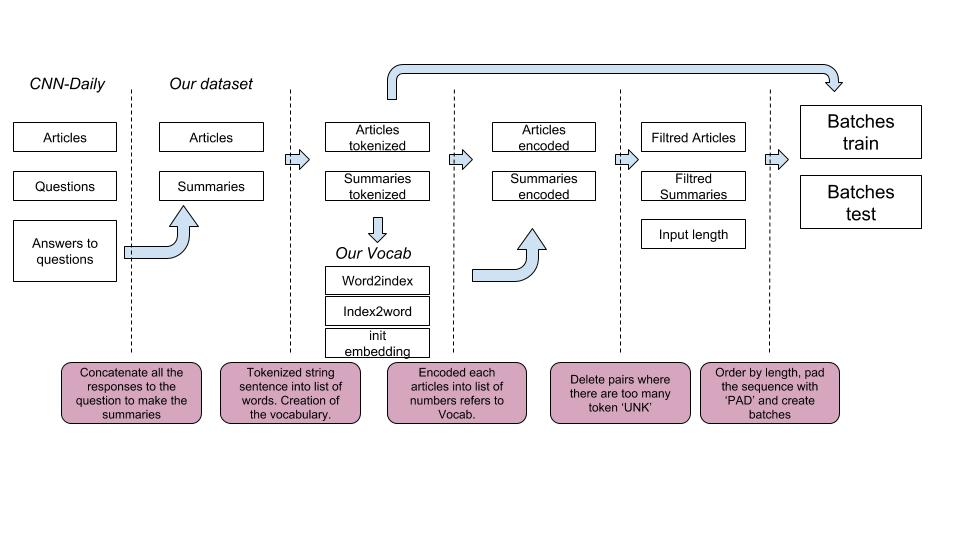

In [9]:
from IPython.display import Image
Image('pictures_presentations/preprocess.jpg')


## B) Code

In [11]:
import unicodedata
import string
import re
import random
import time
import datetime
import math
from nltk.tokenize import sent_tokenize, word_tokenize
from io import open
import torchtext.vocab as vocab
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_packed_sequence, pack_padded_sequence#, masked_cross_entropy
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from math import floor
%matplotlib inline

USE_CUDA =torch.cuda.is_available()
print('On utilise le GPU, '+str(USE_CUDA)+' story')

#HYPERPARAMETRES TEST
MIN_LENGTH_ARTICLE=10
MIN_LENGTH_SUMMARY=5
MAX_LENGTH_OUTPUT_GENERATE=50
dim=100
glove = vocab.GloVe(name='6B', dim=dim)

#TOKENS
PAD_token = 0
SOS_token = 1
EOS_token = 2
UNK_token = 3

.vector_cache/glove.6B.zip:   0%|          | 8.19k/862M [00:00<5:25:32, 44.1kB/s]

On utilise le GPU, False story


.vector_cache/glove.6B.zip: 862MB [02:37, 5.46MB/s]                           
100%|██████████| 400000/400000 [00:21<00:00, 18453.79it/s]


In [14]:
def get_vocab(scribAPI, vocab_size, pad_token=0, unk_token=3, sos_token=1, eos_token=2):
    """
    get word to index and index to word
    :param scribAPI: ScribAI API object
    :param vocab_size: size of the wanted vocab
    """
    vocab = scribAPI.get_vocab(limit=vocab_size)
    vocab_words = list(map(lambda x: x['word'], vocab))
    vocab_counts = list(map(lambda x: x['count'], vocab))
    word2index = {"PAD":pad_token, "SOS":sos_token,"EOS":eos_token,"UNK": unk_token}
    word2count = {"UNK": 1}
    index2word = {pad_token: "PAD", sos_token: "SOS", eos_token: "EOS", unk_token: "UNK"}
    next_token = max([pad_token, unk_token, sos_token, eos_token]) + 1
    for i, word in enumerate(vocab_words):
        try:
            g = glove.vectors[glove.stoi[word]]
            word2index[word] = next_token
            index2word[next_token] = word
            word2count[word] = vocab_counts[i]
            next_token += 1
        except:
            word2count["UNK"] += 1
    return word2index, word2count, index2word    

def get_vect_from_word(word):
    return glove.vectors[glove.stoi[word]]

def tokenize_article_in_words(text_article):
    sentences = [word_tokenize(t) for t in sent_tokenize(text_article)]
    words = []
    for sentence in sentences:
        words.extend(sentence)
    return words

def words_into_vect(words):
    vector = None
    for i, word in enumerate(words):
        if i == 0:
          try:
            vector = get_vect_from_word(word.lower())
          except Exception:
            vector = get_vect_from_word('unk')
        elif i == 1:
          try:
            vector = torch.stack((vector, get_vect_from_word(word.lower())), 1)
          except Exception:
            vector = torch.stack((vector, get_vect_from_word('unk')), 1)
        else:
          try:
            vector = torch.cat((vector, get_vect_from_word(word.lower())), 1)
          except Exception:
            vector = torch.cat((vector, get_vect_from_word('unk')), 1)
    return vector

def create_vocab_from_articles(A):
    word2index = {"PAD":0, "SOS":1,"EOS":2,"UNK": 3}
    word2count = {"UNK": 1}
    index2word = {0: "PAD", 1: "SOS", 2: "EOS", 3: "UNK"}
    n_words = 4  # Count default tokens
    compteur_general=0
    for i, article in enumerate(A):
        words=tokenize_article_in_words(article)
        for word in words:
            compteur_general+=len(words)
            if word not in word2index:
                try:
                    get_vect_from_word(word.lower())
                    word2index[word] = n_words
                    word2count[word] = 1
                    index2word[n_words] = word
                    n_words += 1
                except Exception:
                    word2count["UNK"] += 1
            else:
                word2count[word] += 1
    return word2index, word2count, index2word, compteur_general

def create_ini_embedding(wordtoindex):
    sample=wordtoindex.keys()
    return words_into_vect(sample)

  
def pairs_and_filterpairs(articles,titles,word2index,m,n, seuil=3):
    pairs=[]
    compteur_train=0
    for k, article in enumerate(articles):
        compteur=0
        words=tokenize_article_in_words(article)
        words_target=tokenize_article_in_words(titles[k])
        if len(words) >= m and len(words_target) >= n:
            for word in words:
                try:
                    word2index[word]
                except Exception:
                    compteur=compteur+1
                if word=='UNK':
                    compteur=compteur+1
            for word in words_target:
                try:
                    word2index[word]
                except Exception:
                    compteur=compteur+1
                if word=='UNK':
                    compteur=compteur+1
            if (100*float(compteur)/float(len(words)+len(words_target)))<seuil:
              pairs.append([article,titles[k]])
    return pairs


def indexes_from_sentence(word2index, sentence):
    ind=[]
    for word in sentence.split(' '):
        try:
            ind.append(word2index[word])
        except Exception:
            ind.append(3)
    return ind + [EOS_token]
  
def indexes_from_sentence_target(word2index, sentence,input_seq):
    target_normal=[]
    target_context=[]
    target_pointer=[]
    words_input=input_seq.split(' ')
    for word in sentence.split(' '):
        try:
            target_normal.append(word2index[word])
            target_pointer.append(0)
            target_context.append(0)
        except Exception:
            target_normal.append(UNK_token)
            try:
              index_element = words_input.index(word)
              target_context.append(index_element)
              p=1
            except Exception:
              target_context.append(0)
              p=0
            target_pointer.append(p)
    return target_normal + [EOS_token], target_context +[EOS_token], target_pointer
  
# Pad a with the PAD symbol
def pad_seq(seq, max_length):
    seq += [PAD_token for i in range(max_length - len(seq))]
    return seq
def pad_seq_l(seq, max_length):
    seq += ['PAD' for i in range(max_length - len(seq))]
    return seq

def random_batch(batch_size, pairs,word2index):
    input_seqs = []
    input_seqs_letters=[]
    target_seqs_voc = []
    target_seqs_context = []
    target_seqs_pointer = []
    # Choose random pairs
    for i in range(batch_size):
        pair = random.choice(pairs)
        input_seqs_letters.append(pair[0].split(' '))
        input_seqs.append(indexes_from_sentence(word2index, pair[0]))
        tn,tc,tp=indexes_from_sentence_target(word2index, pair[1],pair[0])
        target_seqs_voc.append(tn)
        target_seqs_context.append(tc)
        target_seqs_pointer.append(tp)
    # Zip into pairs, sort by length (descending), unzip
    seq_pairs = sorted(zip(input_seqs_letters, input_seqs, target_seqs_voc,target_seqs_context, target_seqs_pointer), key=lambda p: len(p[0]), reverse=True)
    input_seqs_letters, input_seqs, target_seqs_voc,target_seqs_context, target_seqs_pointer = zip(*seq_pairs)
    # For input and target sequences, get array of lengths and pad with 0s to max length
    input_lengths = [len(s) for s in input_seqs]
    input_padded = [pad_seq(s, max(input_lengths)) for s in input_seqs]
    target_lengths = [len(s) for s in target_seqs_voc]
    target_padded_voc = [pad_seq(s, max(target_lengths)) for s in target_seqs_voc]
    target_padded_context = [pad_seq(s, max(input_lengths)) for s in target_seqs_context]
    target_padded_pointer = [pad_seq(s, max(target_lengths)) for s in target_seqs_pointer]
    # Turn padded arrays into (batch_size x max_len) tensors, transpose into (max_len x batch_size)
    input_var = Variable(torch.LongTensor(input_padded)).transpose(0, 1)
    target_var_voc = Variable(torch.LongTensor(target_padded_voc)).transpose(0, 1)
    target_var_context= Variable(torch.LongTensor(target_padded_context)).transpose(0, 1)
    target_var_pointer = Variable(torch.LongTensor(target_padded_pointer)).transpose(0, 1)
    
    if USE_CUDA:
        input_var = input_var.cuda()
        target_var_voc = target_var_voc.cuda()
        target_var_context=target_var_context.cuda()
        target_var_pointer=target_var_pointer.cuda()
    
    return input_var, input_lengths, target_var_voc, target_lengths,target_var_context, target_var_pointer,input_seqs_letters

def random_batch_three(batch_size, articles, article_refs, articles2, article_refs2, scores, word2index):
    input_seqs = []
    input_seqs_2 = []
    input_seqs_refs = []
    input_seqs_refs_2 = []
    target_seqs = []
    # Choose random pairs
    for i in range(batch_size):
        k = random.randint(0, len(articles)-1)
        article, article_ref = indexes_from_sentence(word2index, articles[k]), indexes_from_sentence(word2index, article_refs[k])
        article2, article_ref2 = indexes_from_sentence(word2index, articles2[k]), indexes_from_sentence(word2index, article_refs2[k])
        input_seqs.append(article)
        input_seqs_2.append(article2)
        input_seqs_refs.append(article_ref)
        input_seqs_refs_2.append(article_ref2)
        target_seqs.append(scores[k])
    # Zip into pairs, sort by length (descending), unzip
    order_batches1 = [k for k in range(len(input_seqs))]
    order_batches2 = [k for k in range(len(input_seqs_2))]
    seqs1 = sorted(zip(input_seqs, input_seqs_refs, order_batches1), key=lambda p: len(p[0]) + len(p[1]), reverse=True)
    seqs2 = sorted(zip(input_seqs_2, input_seqs_refs_2, order_batches2), key=lambda p: len(p[0]) + len(p[1]), reverse=True)
    input_seqs, input_seqs_refs, order_batches1 = zip(*seqs1)
    input_seqs_2, input_seqs_refs_2, order_batches2 = zip(*seqs2)
    input_lengths = [len(s) for s in input_seqs]
    input_lengths_2 = [len(s) for s in input_seqs_2]
    input_seqs = [pad_seq(s, max(input_lengths)) for s in input_seqs]
    input_seqs_2 = [pad_seq(s, max(input_lengths_2)) for s in input_seqs_2]
    input_seqs_refs_length = [len(s) for s in input_seqs_refs]
    input_seqs_refs_length_2 = [len(s) for s in input_seqs_refs_2]
    input_seqs_refs = [pad_seq(s, max(input_seqs_refs_length)) for s in input_seqs_refs]
    input_seqs_refs_2 = [pad_seq(s, max(input_seqs_refs_length_2)) for s in input_seqs_refs_2]
    target_seqs = list(target_seqs)

    return input_seqs, input_lengths, input_seqs_refs, input_seqs_refs_length, order_batches1, input_seqs_2, input_lengths_2, input_seqs_refs_2, input_seqs_refs_length_2, order_batches2, target_seqs



mv: cannot stat 'preprocess_data.py': No such file or directory


In [0]:
print("Charge Vocab & pretrain embedding")
wordtoindex, wordtocount, indextoword = get_vocab(scribAPI, 10000)
pretrained_weight=create_ini_embedding(wordtoindex).transpose(0,1)


In [0]:
print("Charge Batch")
articles, titles = cnn_dataset.get_batch(batch_size=30)

Charge Batch


In [0]:
print('Lexique of %d words' % len(indextoword))
print("Create pairs")
pairs_train=pairs_and_filterpairs(articles,titles,wordtoindex, MIN_LENGTH_ARTICLE,MIN_LENGTH_SUMMARY, seuil=10)
print('%d pairs' % len(pairs_train))
articles_finals=[]
for i in pairs_train:
  articles_finals.append(i[0])
wti, wtc, itw, c=create_vocab_from_articles(articles_finals)
print(c)
print('%d tokens "UNK", represent %.4f ' % (wtc["UNK"], float(wtc["UNK"])/float(c)))
#random_batch(50, pairs_train, wordtoindex)

Lexique of 9976 words
Create pairs
27 pairs
27346719
121 tokens "UNK", represent 0.0000 


## C)  TODO 

it would be nice to add: 

1- Put the dataset in the form of token as did stanford

2- Preprocess the data in BPE format https://arxiv.org/pdf/1508.07909.pdf

3- Add the Name Entity Recognition (NER) from the Standford model https://nlp.stanford.edu/software/CRF-NER.html

# IV- Sequence to Sequence Model

## A) Theory

### 1/ Vanilla Seq2seq

I refer you to this article which I find very clear: https://guillaumegenthial.github.io/sequence-to-sequence.html

### 2/ Attention Mechanism

In this Seq2Seq, several attention mechanisms were implemented: 


1.   Attention de Bahdanau et al.
2.   Intra-temporal attention attention
3.   Attention intra-decoder attention

The attention of Bahdanau et al. has been presented in the blog above, better than I will be doing. I just want to introduce the notations: I call alpha the word importance distribution of the input.

This is the most important criterion and we will reuse it later. I'll introduce you the intra temporal attention (introduced when publishing *Sankaran, Baskaran, et al. "Temporal attention model for neural machine translation." arXiv preprint arXiv:1608.02927 (2016).*) and which follows almost immediately from the previous definition. Let's start with the principle. IBM explains that their goal is "to make attention aware of what it focused on in the previous step." To do this, they will calculate an intermediate step, b which will be the softmax from enrgie to linsta,t t. Then alpha will be the distribution of b. Thus, it calculates with a time dependency the distribution.

Why using that here? In the publication "Abstractive text summarization using sequence-to-sequence rnns and beyond." https://arxiv.org/pdf/1602.06023.pdf, it would seem that this avoids repetitions.

Finally, the intra decoder attention is introduced by Saleforces, paragraph 2.2. The principle is exactly the same as for temporal encoder but this time it is the decoder. So there can be up to 2 attention mechanisms in this model!





### 3/ How to deal the unknown words ?

One of the big flaws of this Ses2Seq model is its inability to handle words that are rare. So they are not in is the vocab and therefore it has never seen. 
Indeed, the output of a seq2seq is a propability of all the words of the vocabulary and we pick the one with the highest probability. But what if you wish to "copy" essential information from the statement? It is the same for numbers, dates etc.... Advanced data pre-processing - BPE initilization https://arxiv.org/pdf/1508.07909.pdf and Stanford named entity recognizer (NER) (https://nlp.stanford.edu/software/CRF-NER.html Manning et al., 2014) - reduced this problem without deleting it. A team from CIFAR and IBM proposed a solution based precisely on alpha distribution : Pointing the Unknown Words https://arxiv.org/pdf/1603.08148.pdf. There is a "switch" that decides whether to generate a word from the voice or whether to copy it. Okay, but if we want the copy mechanism work, which one do we choose? and that's where alpha comes in. We take the one alpha considers the most important. 

Figure 3 in the publication summarizes the proposed solution very well.


### 4/ Extras 

There are many things to add from a theoretical point of view. The most important point is that we used GRU cells and not a convolutional sequence to sequence as I told you at the beginning: Gehring, Jonas, et al. "Convolutional sequence to sequence learning." arXiv preprint arXiv:1705.03122 (2017). Github link: https://github.com/facebookresearch/fairseq-py). For two reasons, the first is that it makes more weight to train. The second is that we but we were also bound by time. There is a debate as to which of the two methods (recurentes or CNN) are the most effective or have the most potential for success - sorry I can't find the publications that talk about it - .

Google developed the Transformers model: *Vaswani, Ashish, et al. "Attention is all you need." Advances in Neural Information Processing Systems. 2017.* *Liu, Peter J., et al. "Generating Wikipedia by Summarizing Long Sequences." arXiv preprint arXiv:1801.10198 (2018).*. We could also have implemented this model but again we didn't have the time.

Finally, we questioned the reason for the output format. If we generate at embedding output, we lose this OOV pb? we are skeptical and we would have liked to implement it but again, not the time.


## B) Code

In [ ]:
class EncoderRNN(nn.Module):
  
    def __init__(self, input_size, embed_size, hidden_size,pretrained_weight, n_layers=1, dropout=0.5):
        super(EncoderRNN, self).__init__()
        """
        :param input_size
        :param embed_size
        :param hidden_size
        :param pretrained_weight
        :param n_layers
        :param dropout
        """
        # Define parameters
        self.input_size = input_size  # V Taille Vocabulary (can be different, here not)
        self.hidden_size = hidden_size  # H
        self.embed_size = embed_size  # E
        self.n_layers = n_layers  # L (1 per default)
        self.dropout = dropout  # 0.5 per default
        # Define layers
        self.embedding = nn.Embedding(input_size, embed_size)  # Init (V,E)
        self.embedding.weight = nn.Parameter(pretrained_weight) #Init with glove
        self.embedding = nn.Embedding(input_size, embed_size)
        self.gru = nn.GRU(embed_size, hidden_size, n_layers, dropout=self.dropout,
                          bidirectional=True)  # Init (E,H,L, Bidirectionnel!)

    def forward(self, input_seqs, input_lengths, hidden=None):
        """
        :param input_seqs:
            Variable of shape (T,B), T is the number of words in the longuest sentence, B is Batchsize. Contening the indexing of the words reference to the voc
        :param input_lengths:
            list of integers (len=B) which reprensents the number of words in sequence for each batch. Normally Max(input_lengths)=T
        :param hidden:
            initial state of GRU
        :returns:
            GRU outputs in shape (T,B,H)
            last hidden stat of RNN(L*bidirectionnal,B,H)
        """
        embedded = self.embedding(input_seqs)  # (T,B,E)
        packed = torch.nn.utils.rnn.pack_padded_sequence(embedded,input_lengths)  # cf doc pytorch : take embedding and input_length. Ready to go
        outputs, hidden = self.gru(packed, hidden)
        outputs, output_lengths = torch.nn.utils.rnn.pad_packed_sequence(outputs)  # unpack (back to padded)
        outputs = outputs[:, :, :self.hidden_size] + outputs[:, :, self.hidden_size:]  # Sum bidirectional outputs
        
        return outputs, hidden  # (T,B,H),(L*bidirectionnal,B,H) | bidirectionnal=2 here



In [ ]:
class Attn(nn.Module):
    
    def __init__(self, method, hidden_size, temporal=False):
        super(Attn, self).__init__()
        """
        :param method
        :param hidden_size
        :param temporal
        """
        # Define parameters
        self.method = method  # 2 methods cf publi
        self.hidden_size = hidden_size  # H
        self.temporal = temporal  # Temporal attention encoder
        self.softmax = nn.Softmax()
        # Define layers
        self.attn = nn.Linear(self.hidden_size * 2, hidden_size)  # Init(2*H,H)
        self.v = nn.Parameter(torch.rand(hidden_size))
        stdv = 1. / math.sqrt(self.v.size(0))
        self.v.data.normal_(mean=0, std=stdv)


    def forward(self, hidden, encoder_outputs, E_history=None):
        """
        :param hidden:
            (B,H)
        :param encoder_outputs:
            (T,B,H) can be also hidden decoder accumulation over time (t+1,B,H), depends on attention encoder or decoder
        :param E_history:
           Encoder history use only if intra temporal attention. Init with None, then (t,B,T)
        :returns:
            attn_energies which is alpha
        """
        max_len = encoder_outputs.size(0)
        this_batch_size = encoder_outputs.size(1)
        H = hidden.repeat(max_len, 1, 1).transpose(0, 1)
        encoder_outputs = encoder_outputs.transpose(0, 1)  # [B*T*H]
        attn_energies = self.score(H, encoder_outputs)
        if self.temporal:
            if E_history is None:
                E_history = attn_energies.unsqueeze(0)
            else:
                E_history = torch.cat([E_history, attn_energies.unsqueeze(0)], 0)
                hist = E_history.view(-1, this_batch_size * max_len).t()
                attn_energies = self.softmax(hist)[:, -1].contiguous().view(this_batch_size, max_len)
            return F.softmax(attn_energies).unsqueeze(1), E_history
        else:
          # Normalize energies to weights in range 0 to 1, resize to 1 x B x S
          return F.softmax(attn_energies).unsqueeze(1)

    def score(self, hidden, encoder_output):
        """
        :param hidden
        :param encoder_output
        """
        if self.method == 'dot':
            energy = hidden.dot(encoder_output)
            return energy
        elif self.method == 'general':
            energy = self.attn(encoder_output)
            energy = hidden.dot(energy)
            return energy
        elif self.method == 'concat':
            input=torch.cat([hidden, encoder_output], 2)
            energy = F.tanh(self.attn(input))  # [B*T*2H]->[B*T*H]
            energy = energy.transpose(2, 1)  # [B*H*T]
            v = self.v.repeat(encoder_output.data.shape[0], 1).unsqueeze(1)  # [B*1*H]
            energy = torch.bmm(v, energy)  # [B*1*T]
            return energy.squeeze(1)  # [B*T]

In [ ]:
class DecoderStep(nn.Module):

    def __init__(self, hidden_size, embed_size, output_size, n_layers, temporal=True, de_att_bol=True, point_bol=True, attention_bol=True, dropout_p=0.1):
        super(DecoderStep, self).__init__()
        """
        :param hidden_size
        :param embed_size
        :param output_size
        :param n_layers
        :param temporal
        :param de_att_bol
        :param point_bol
        :param attention_bol
        :param dropout_p   
        """
        # Define parameters
        self.hidden_size = hidden_size  # H
        self.output_size = output_size  # V
        self.n_layers = n_layers  # L
        self.dropout_p = dropout_p  # 0.1 per default
        self.temporal = temporal  # bolean to use intra temporal attention on input sequence cf. Temporal attention model for neural machine translation. arXiv preprint arXiv:1608.02927, 2016
        self.decoder_attention_bolean = de_att_bol  # bolean to use intra decoder attention
        self.pointer_boloan = point_bol
        self.attention_bolean=attention_bol
        self.embed_size=embed_size
        # Define layers
        self.embedding = nn.Embedding(output_size, embed_size) # Init(V,E)
        self.dropout = nn.Dropout(dropout_p)
        if self.attention_bolean:
          self.attn_encoder = Attn('concat', hidden_size, temporal) # Init(methode score, H, bolean temporal), cf class
          if self.decoder_attention_bolean:
            self.attn_decoder = Attn('concat', hidden_size, temporal=False)
            self.gru = nn.GRU(2*hidden_size + embed_size, hidden_size, n_layers, dropout=dropout_p)# init(3*H+E,H,L) 
            self.out = nn.Linear(hidden_size * 3, output_size)  # Wout(3H,V) case [1] and [2]
            self.out_proba = nn.Linear(hidden_size * 3, 1)
          else:
            self.gru = nn.GRU(hidden_size + embed_size, hidden_size, n_layers, dropout=dropout_p)# init(2*H+E,H,L) 
            self.out = nn.Linear(hidden_size * 2, output_size)  # Wout(2H,V) case [1] and [2]
            self.out_proba = nn.Linear(hidden_size * 2, 1)
        else:
          self.gru = nn.GRU(embed_size, hidden_size, n_layers, dropout=dropout_p)# init(E,H,L) 
          self.out = nn.Linear(hidden_size, output_size)  # Wout(H,V) case [1] and [2]
        
    def forward(self, word_input, last_hidden, encoder_outputs,E_hist,t, hd_history, input_batches):
        """
        :param word_input:
            tensor with SOS_Token length B
        :param last_hidden:
            Last hidden of the decoder, initialization with last hidden encoder (L,B,H)
        :param encoder_outputs:
            encoder output (T,B,H)
        :param E_hist:
            Encoder history use only if intra temporal attention. Init with None, then (1,B,T)
        :param t:
            number of time generate words [0 to max_length sequence]
        :param hd_history:
            hidden decoder accumulation over time (t+1,B,H)
        :param input_batches:
            input de l'encoder to be able to point to the entry (V,B)
        :returns:
            output decoder : max proba is the word to generate (B,V)
            hidden : will be last hidden next time
            alpha : to plot during the evaluation
            E_history : will be E_hist next time
            hd_history : will be hd_history next time
        """
        # Get the embedding of the current input word (last output word)
        word_embedded = self.embedding(word_input).view(1, word_input.size(0), -1)  # (1,B,E)
        word_embedded = self.dropout(word_embedded)
        if self.attention_bolean:
          # Calculate attention weights -temporal or not- of encoder (alpha) and apply to encoder outputs (context_encoder)
          if self.temporal:
              alpha, E_history = self.attn_encoder(last_hidden[-1], encoder_outputs, E_hist)  # (B,1,T) (1,B,T)
          else:
              E_history = None  # None
              alpha = self.attn_encoder(last_hidden[-1], encoder_outputs)  # (B,1,T) alpha will be use later
          context_encoder = alpha.bmm(encoder_outputs.transpose(0, 1))  # (B,1,H)
          context_encoder = context_encoder.transpose(0, 1)  # (1,B,H) context with the encoder.
          # attention on decoder and RNN input
          if self.decoder_attention_bolean:
              if t:  # Recurrence
                  alpha_d = self.attn_decoder(last_hidden[-1], hd_history)  # (B,1,t)
                  context_decoder = alpha_d.bmm(hd_history.transpose(0, 1))  # (1,B,H)
                  context_decoder = context_decoder.transpose(0, 1)  # (1,H,B)
                  hd_history = torch.cat([hd_history, last_hidden[-1].unsqueeze(0)], dim=0)  # (t+1,B,H)
              else:  # Initialisation
                  context_decoder = Variable(torch.zeros(1, word_embedded.size()[1], self.hidden_size))  # init to zero
                  if USE_CUDA:
                    context_decoder=context_decoder.cuda()
              rnn_input_old = torch.cat((word_embedded, context_encoder), 2)
              rnn_input = torch.cat((rnn_input_old, context_decoder), 2)  # (1,B,H+E+t) idem
          else:
            # Combine embedded input word and attended context, run through RNN
            rnn_input = torch.cat((word_embedded, context_encoder), 2)
        else:
          rnn_input=word_embedded
        #RNN
        output, hidden = self.gru(rnn_input, last_hidden)
        output = output.squeeze(0)  # (1,B,H)->(B,H)
        if self.attention_bolean:
          context_encoder = context_encoder.squeeze(0)
          output_concat=torch.cat((output, context_encoder),1)
          #pointer
          if self.pointer_boloan:
            if self.decoder_attention_bolean:
                context_decoder = context_decoder.squeeze(0)
                output_concat_v2=torch.cat((output_concat, context_decoder),1)
                p_yt_sachant_paspointer = F.log_softmax(self.out(output_concat_v2))
                p_pointer=F.sigmoid(self.out_proba(output_concat_v2))
            else:
                p_yt_sachant_paspointer = F.log_softmax(self.out(output_concat))
                p_pointer=F.sigmoid(self.out_proba(output_concat))
            #Calcul proba finale
            alpha_interet = alpha.squeeze(1)  # (T,B)
            output=[p_yt_sachant_paspointer,alpha_interet, p_pointer]   
          else:
            if self.decoder_attention_bolean:
              context_decoder = context_decoder.squeeze(0)
              output_concat_v2=torch.cat((output_concat, context_decoder),1)
              output = F.log_softmax(self.out(output_concat_v2))
            else:
              output = F.log_softmax(self.out(output_concat))
        else:
            alpha=None
            E_history=None
            output = F.log_softmax(self.out(output))
        
        return output, hidden, alpha, E_history, hd_history
 

# Reward by human feedback

## A) Theory

First of all, let us remember that we want to create a standard that checks the following criteria:
If the $R_1$ abstract associated with $A_1$ is better than the $R_2$ abstract associated with $A_2$, then the standard result for $(R_1, A_1)$ must be greater than that of $(R_2, A_2)$.
Abstracts written in a better French must have a higher name than those that are not.
Abstracts should avoid repetition, examples...

The objective of our standard is therefore to infer all this by preferences $(R_1, A_2) > (R_2, A_2)$.

However, we also need to create this database preferably at the same time as our sequence to sequence network is trained.

For that, we have, on our web interface, a nail where the summaries are displayed progressively and where one can choose which of the two presented corresponds more to a good summary. All preferences are then saved and we use these preferences to make the metric.

Now let's talk about how to make a metric from preference.  After all, we now know that some summaries are better than others, but we can't, from a couple article summary $(R, A)$ given a number, a "mistake" to that couple ! 

For that we realized another network composed of  
the result of a concatenation encoder (in relation to the embeddind size) of the article and the abstract 
3 layers of 2D convolution 
2 single linear layers 

the result is a number corresponding to the error. 

### How to train him 

We were inspired by the OpenAI publication. 

To train it, we take a couple of preference, calculate the error for the two pairs article, abstract associated then calculate : 
$$ P_{1, 2} = \frac{\text{error}_1}{\text{error}_1 + \text{error}_2}$$ 
$$ P_{2, 1} = \frac{\text{error}_2}{\text{error}_1 + \text{error}_2}$$ 

We define more $\mu$ which is worth $\mu =[0, 1]$ if article 2 is better than article 1 and $\mu =[1, 0]$ if article 1 is better than article 2. 

If both are equivalent then $mu = $[0.5, 0.5]$.

The cross-entropy is then calculated: $$ loss = -\mu[0] \log(P_{1, 2}) - \mu[1] \log(P_{2, 1}) $$ which is the final optimization criterion.

## B) Code

In [ ]:
class RewardPredictor(nn.Module):
  
  def __init__(self, input_size, embed_size, hidden_size, indextoword,
                 wordtoindex, num_layer_encoder=1,
                 dropout=0.5, SOS_token=1, EOS_token=2, PAD_token=0, batch_size=5, article_max_size=500):
    super(RewardPredictor, self).__init__()
    """
    :param input_size:
    :param embed_size:
    :param hidden_size:
    :param indextoword:
    :param wordtoindex
    :param num_layer_encoder:
    :param dropout:
    :param SOS_token:
    :param EOS_token:
    :param PAD_token:
    :param batch_size:
    :param article_max_size:
    """
    super(RewardPredictor, self).__init__()
    self.encoder = EncoderRNN(input_size, embed_size, hidden_size,pretrained_weight, n_layers=num_layer_encoder, dropout=dropout)
    
    # conv2d: Hout = floor((Hin−kernel_size[0])/stride[0]+1)
    # Maxpool: Hout = floor((Hin-kernel_size[0])/stride[0]+1)
    
    self.conv1 = nn.Conv2d(1, 8, kernel_size=10, stride=4, padding=0, dilation=1)
    # Max pooling of size 2 kernel_size=2, stride=2, padding=0, dilation=1
    T, H = floor((article_max_size - 10)/4 + 1), floor((2*hidden_size - 10)/4 + 1)
    T, H = floor((T - 2)/2 + 1), floor((H - 2)/2 + 1)
    
    self.conv2 = nn.Conv2d(8, 8, kernel_size=7, stride=3)
    # Max pooling of size 2 kernel_size=2, stride=2, padding=0, dilation=1
    T, H = floor((T-7)/3 + 1), floor((H-7)/3 + 1)
    T, H = floor((T-2)/2 + 1), floor((T-2)/2 + 1)
    
    self.conv3 = nn.Conv2d(8, 8, kernel_size=5, stride=2)
    # Max pooling of size 2 kernel_size=2, stride=2, padding=0, dilation=1
    T, H = floor((T-5)/2 + 1), floor((H-5)/2 + 1)
    # T, H = floor((T-2)/2 + 1), floor((T-2)/2 + 1)  # enlevé car pass assez de dim
    print(2*hidden_size, article_max_size)
    print("size reward", 16*T*H, 50)
    self.out_layer1 = nn.Linear(8 * T * H-8, 50)
    self.out_layer2 = nn.Linear(50, 1)
    
    self.indextoword = indextoword
    self.wordtoindex = wordtoindex
    self.SOS_token = SOS_token
    self.EOS_token = EOS_token
    self.PAD_token = PAD_token
    self.batch_size = batch_size
    self.article_max_size = article_max_size

    if USE_CUDA:
        self.encoder.cuda()
        self.conv1.cuda()
        self.conv2.cuda()
        self.out_layer1.cuda()
        self.out_layer2.cuda()
  
  def forward(self, input_seq_ref, input_seq_ref_length, input_seq, input_seq_length):
    """
    Evaluate the reward function
    :param input_seq_ref: ref sequence (article)
    :param input_seq: summary sequence
    """
    # Run through encoder
    # print(input_seq_ref, input_seq_ref_length)
    input_seq = torch.squeeze(input_seq, 1)
    input_seq_ref = torch.squeeze(input_seq_ref, 1)
    #input_seq_ref = torch.transpose(input_seq_ref, 0, 1)
    #input_seq = torch.transpose(input_seq, 0, 1)

    # print(input_seq_ref)
    encoder_outputs, encoder_hidden = self.encoder(input_seq, input_seq_length, None)
    encoder_ref_outputs, encoder_ref_hidden = self.encoder(input_seq_ref, input_seq_ref_length, None)
    input_metric = F.pad(encoder_outputs, 
                         (0, 0, 0, 0, 0, self.article_max_size - encoder_outputs.size(0)), 
                         "constant", self.PAD_token)
    input_metric_ref = F.pad(encoder_ref_outputs, 
                         (0, 0, 0, 0, 0, self.article_max_size - encoder_ref_outputs.size(0)), 
                         "constant", self.PAD_token)
    input_metric = torch.transpose(input_metric, 0, 1)
    input_metric_ref = torch.transpose(input_metric_ref, 0, 1)
    print("sortie", input_metric)
    compare_vector = torch.cat((input_metric, input_metric_ref), dim=1)
    compare_vector = torch.unsqueeze(compare_vector, 1)  # Add channel dimension
    print("avant")
    print(compare_vector.size())
    compare_vector = F.max_pool2d(F.relu(self.conv1(compare_vector)), 2)
    print("après C1")
    print(compare_vector.size())
    compare_vector = F.max_pool2d(F.relu(self.conv2(compare_vector)), 2)
    print("après C2")
    print(compare_vector.size())
    # compare_vector = F.max_pool2d(F.relu(self.conv3(compare_vector)), 2)
    compare_vector = F.relu(self.conv3(compare_vector))  # Pas de pooling ici, pas assez de dimension apparement
    print("après C3")
    print(compare_vector.size())
    compare_vector = compare_vector.view(self.batch_size, 1, -1)
    print("maitenant")
    print(compare_vector.size())
    compare_vector = self.out_layer1(compare_vector)
    return torch.squeeze(self.out_layer2(compare_vector))

# V- Under fitting training

## A)Vue d'ensemble du projet

First of all we have a main sequence to sequence model, the one who will do the summary. You can't train such model from scratch, it would take too long. So we'll UNDER TRAIN IT normally, i.e. by comparing to the target summary. Then we'll stop and finish training him on the reawrd. Until it can be generate "valid" texts.

We also have a reward model that takes 1 article and 1 abstract and comes out a value! But this rexard model takes in input not the text directly but a compressed version of the artcle => Auto encoder. You have to train this AE model. We decided to take the Seq2seq basic model (without attention) and train it to input an article to output the same article. Then we only take the encoder and estimate that at the output of the encoder, the article is well restored. we do the same for the summary. we concatenate and we get the input of the reward. Finally, we want the reward to include ROUGE properties. For that at the beginning, we train it under the Red metric

So far 3 model to train and escape: seq2seq hand, seq2seq AE and Reward.
We could train these scratch models (except AE) but it would take too long.

## B) Code

### 1/ Seq2Seq

In [ ]:
class Seq2SeqTrainer(nn.Module):
  """
  Model used for the human preferences metric
  """
  def __init__(self, attn_model, hidden_size, embed_size, n_layers, wordtoindex, indextoword,
               n_epochs, encoder_temporal,decoder_attention_bol, pairs_train,
                pointeur_bolean, attention_bolean, tie_weights_bolean, num_layer_encoder=1,
                num_layer_decoder=1,dropout=0.5, SOS_token=1, EOS_token=2, PAD_token=0, batch_size=5,
                clip=50,learning_rate = 0.0001, article_max_size=500, decoder_learning_ratio=5,
                plot_every=20, print_every = 100, evaluate_every = 1000, max_length=100):
    super(Seq2SeqTrainer, self).__init__()
    """
    :param input_size:
    :param embed_size:
    :param hidden_size:
    :param output_size:
    :param indextoword:
    :param wordtoindex
    :param num_layer_encoder:
    :param num_layer_decoder:
    :param dropout:
    :param SOS_token:
    :param EOS_token:
    :param PAD_token:
    :param batch_size:
    :param article_max_size:
    """
    # Configure models
    self.attn_model = attn_model
    self.hidden_size = hidden_size
    self.n_layers = n_layers
    self.dropout = dropout
    self.batch_size = batch_size
    self.embed_size=embed_size
    # Configure training/optimization
    self.clip = clip
    self.learning_rate = learning_rate
    self.decoder_learning_ratio = decoder_learning_ratio
    self.n_epochs = n_epochs
    self.plot_every = plot_every
    self.print_every = print_every
    self.evaluate_every = evaluate_every
    #config type model
    self.encoder_temporal=encoder_temporal
    self.decoder_attention_bol=decoder_attention_bol
    self.pointeur_bolean=pointeur_bolean
    self.attention_bolean=attention_bolean
    self.tie_weights_bolean=tie_weights_bolean
    self.indextoword=indextoword
    self.wordtoindex=wordtoindex
    self.pairs_train=pairs_train
    # Initialize models
    self.encoder = EncoderRNN(len(indextoword), embed_size, hidden_size,pretrained_weight, n_layers=n_layers, dropout=dropout)
    self.decoder = DecoderStep(hidden_size, embed_size,len(indextoword), n_layers, dropout_p=dropout, temporal=encoder_temporal,de_att_bol=decoder_attention_bol,point_bol=pointeur_bolean,attention_bol=attention_bolean )
    self.max_length=max_length
    # Move models to GPU
    if USE_CUDA:
        self.encoder.cuda()
        self.decoder.cuda()


  def train_step(self, input_batches, input_lengths, target_batches, target_lengths, encoder_optimizer, decoder_optimizer, criterion, target_context, target_pointer,E_hist=None):
    """
      
      
      
    """
    # Zero gradients of both optimizers
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()
    total_loss = 0 # Added onto for each word
    # Run words through encoder
    encoder_outputs, encoder_hidden = self.encoder(input_batches, input_lengths, None)
    # Share embedding
    self.decoder.embedding.weight = self.encoder.embedding.weight
    # Optionally tie weights as in:
    # "Using the Output Embedding to Improve Language Models" (Press & Wolf 2016)
    if self.tie_weights_bolean:
      # Depend of the configuration you choose, the dimmensions must be : E= H or 2*H ou 3*H
      decoder.out.weight = encoder.embedding.weight
    # Prepare input and output variables
    decoder_input = Variable(torch.LongTensor([SOS_token] * batch_size))
    decoder_hidden = encoder_hidden[:self.decoder.n_layers] # Use last (forward) hidden state from encoder
    max_target_length = max(target_lengths)
    all_decoder_outputs = Variable(torch.zeros(max_target_length, self.batch_size, self.decoder.output_size))
    all_decoder_outputs_context = Variable(torch.zeros(max_target_length, self.batch_size, input_lengths[0]))
    all_decoder_outputs_pointer = Variable(torch.zeros(max_target_length, self.batch_size,1))
    hidden_history_decoder = decoder_hidden[-1].unsqueeze(0)
    # Move new Variables to CUDA
    if USE_CUDA:
        decoder_input = decoder_input.cuda()
        all_decoder_outputs = all_decoder_outputs.cuda()
        all_decoder_outputs_context=all_decoder_outputs_context.cuda()
        all_decoder_outputs_pointer=all_decoder_outputs_pointer.cuda()
    # Run through decoder one time step at a time
    for t in range(max_target_length):
        decoder_output, decoder_hidden, decoder_attn, E_hist,hidden_history_decoder = self.decoder(
            decoder_input, decoder_hidden, encoder_outputs,E_hist,t, hidden_history_decoder, input_batches)
        if self.pointeur_bolean:
          all_decoder_outputs[t] = decoder_output[0]
          all_decoder_outputs_context[t] = decoder_output[1]
          all_decoder_outputs_pointer[t] = decoder_output[2]
        else:        
          all_decoder_outputs[t] = decoder_output
        decoder_input = target_batches[t] # Next input is current target
    # Loss calculation and backpropagation
    if self.pointeur_bolean:
      #1er loss : le pointeur
      all_decoder_outputs_pointer=all_decoder_outputs_pointer.squeeze(2)
      loss1=criterion(all_decoder_outputs_pointer,torch.max(target_pointer, 1)[1])
      if 1 in target_pointer.cpu().data.numpy():
        #update tous les poids
        loss2 = masked_cross_entropy(
            all_decoder_outputs.transpose(0, 1).contiguous(), # -> batch x seq
            target_batches.transpose(0, 1).contiguous(), # -> batch x seq
            target_lengths)
        total_loss= sum([loss1,loss2])
      else:
        loss2 = masked_cross_entropy(
            all_decoder_outputs.transpose(0, 1).contiguous(), # -> batch x seq
            target_batches.transpose(0, 1).contiguous(), # -> batch x seq
            target_lengths) 
        #loss sur l'attention en pointer, ca ne va pas tuer l'attention ?
        #loss3 = 
        total_loss= sum([loss1,loss2])
    else:    
      total_loss = masked_cross_entropy(
          all_decoder_outputs.transpose(0, 1).contiguous(), # -> batch x seq
          target_batches.transpose(0, 1).contiguous(), # -> batch x seq
          target_lengths)
    total_loss.backward()
    # Clip gradient norms
    ec = torch.nn.utils.clip_grad_norm(self.encoder.parameters(), self.clip)
    dc = torch.nn.utils.clip_grad_norm(self.decoder.parameters(), self.clip)
    # Update parameters with optimizers
    encoder_optimizer.step()
    decoder_optimizer.step()

    return total_loss.data[0], ec, dc
        
      
  def evaluate(self, input_seq):
    """
    
    
    
    """
    input_lengths = [len(input_seq.split())]
    input_seqs = [indexes_from_sentence(wordtoindex, input_seq)]
    input_batches = Variable(torch.LongTensor(input_seqs), volatile=True).transpose(0, 1)
    words_input=input_seq.split(' ')
    if USE_CUDA:
        input_batches = input_batches.cuda()
    # Set to not-training mode to disable dropout
    self.encoder.train(False)
    self.decoder.train(False)
    # Run through encoder
    encoder_outputs, encoder_hidden = self.encoder(input_batches, input_lengths, None)
    # Share embedding
    self.decoder.embedding.weight = self.encoder.embedding.weight
    # Optionally tie weights as in:
    # "Using the Output Embedding to Improve Language Models" (Press & Wolf 2016)
    if self.tie_weights_bolean:
      # Depend of the configuration you choose, the dimmensions must be : E= H or 2*H ou 3*H
      self.decoder.out.weight = self.encoder.embedding.weight
    # Create starting vectors for decoder
    decoder_input = Variable(torch.LongTensor([SOS_token]), volatile=True) # SOS
    decoder_hidden = encoder_hidden[:self.decoder.n_layers] # Use last (forward) hidden state from encoder
    hidden_history_decoder = decoder_hidden[-1].unsqueeze(0)
    E_hist = None
    if USE_CUDA:
        decoder_input = decoder_input.cuda()
    # Store output words and attention states
    decoded_words = []
    
    decoder_attentions = torch.zeros(max(input_lengths) + 1, max(input_lengths) + 1)
    # Run through decoder
    for di in range(self.max_length):
        decoder_output, decoder_hidden, decoder_attention, E_hist,hidden_history_decoder = self.decoder(
            decoder_input, decoder_hidden, encoder_outputs,E_hist,di, hidden_history_decoder,input_batches
        )
        if self.attention_bolean:
          if self.pointeur_bolean:
            [decoder_output_voc, decoder_output_context, decoder_output_pointer]=decoder_output
            decoder_attentions[di,:decoder_attention.size(2)] += decoder_output_context.squeeze(0).cpu().data
        if self.pointeur_bolean:
          [decoder_output_voc, decoder_output_context, decoder_output_pointer]=decoder_output
          if decoder_output_pointer.cpu().data.numpy()[0][0]>0.5:
            topv, topi = decoder_output_context.data.topk(1)
            ni = topi[0][0]
            topv2, topi2 = decoder_output_context.data.topk(2)
            ni2 = topi2[0][0]
            if len(decoded_words)>=2:
              if decoded_words[-1]==decoded_words[-2]:
                if words_input[ni]==decoded_words[-1]:
                  ni=ni2
            decoded_words.append(words_input[ni])
            try:
              ni=wordtoindex[words_input[ni]]
            except Exception:
              ni=3
            decoder_input = Variable(torch.LongTensor([ni]))
          else:
            topv, topi = decoder_output_voc.data.topk(1)
            ni = topi[0][0]
            topv2, topi2 = decoder_output_context.data.topk(2)
            ni2 = topi2[0][0]
            if ni == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
              if len(decoded_words)>=2:
                if decoded_words[-1]==decoded_words[-2]:
                  if indextoword[ni]==decoded_words[-1]:
                    ni=ni2              
              decoded_words.append(self.indextoword[ni])
              decoder_input = Variable(torch.LongTensor([ni]))
        else:        
          # Choose top word from output
          topv, topi = decoder_output.data.topk(1)
          ni = topi[0][0]
          topv2, topi2 = decoder_output.data.topk(2)
          ni2 = topi2[0][0]
          if ni == EOS_token:
              decoded_words.append('<EOS>')
              break
          else:
              if len(decoded_words)>=2:
                if decoded_words[-1]==decoded_words[-2]:
                  if indextoword[ni]==decoded_words[-1]:
                    ni=ni2
              decoded_words.append(self.indextoword[ni])
              decoder_input = Variable(torch.LongTensor([ni]))
        if USE_CUDA:
          decoder_input = decoder_input.cuda()
    # Set back to training mode
    self.encoder.train(True)
    self.decoder.train(True)

    return decoded_words, decoder_attentions[:di+1, :len(encoder_outputs)]
  
  def evaluate_and_show_attention(self, input_sentence, target_sentence=None):
    output_words, attentions = self.evaluate(input_sentence)
    output_sentence = ' '.join(output_words)
    print('>', input_sentence)
    if target_sentence is not None:
        print('=', target_sentence)
    print('<', output_sentence)
    
    show_attention(input_sentence, output_words, attentions)
  
  
  def evaluate_randomly(self):
    [input_sentence, target_sentence] = random.choice(pairs_train)
    self.evaluate_and_show_attention(input_sentence, target_sentence)
    
  
  
  def train_all(self):
    epoch=0
    # Initialize optimizers and criterion
    encoder_optimizer = optim.Adam(self.encoder.parameters(), lr=self.learning_rate)
    decoder_optimizer = optim.Adam(self.decoder.parameters(), lr=self.learning_rate * self.decoder_learning_ratio)
    criterion = nn.CrossEntropyLoss()
    # Keep track of time elapsed and running averages
    start = time.time()
    plot_losses = []
    print_loss_total = 0 # Reset every print_every
    plot_loss_total = 0 # Reset every plot_every
    # Begin!
    ecs = []
    dcs = []
    eca = 0
    dca = 0
    while epoch < self.n_epochs:
        print("Epoch:", epoch)
        epoch += 1
        # Get training data for this cycle
        input_batches, input_lengths, target_batches, target_lengths,target_context, target_pointer,_ = random_batch(self.batch_size,self.pairs_train, self.wordtoindex)
        # Run the train function
        loss, ec, dc = self.train_step(
            input_batches, input_lengths, target_batches, target_lengths,
            encoder_optimizer, decoder_optimizer, criterion,target_context, target_pointer
        )
        # Keep track of loss
        print_loss_total += loss
        plot_loss_total += loss
        eca += ec
        dca += dc
        if epoch == 5:
            self.evaluate_randomly()
        if epoch % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print_summary = '%s (%d %d%%) %.4f' % (time_since(start, epoch / n_epochs), epoch, epoch / n_epochs * 100, print_loss_avg)
            print(print_summary)
            show_losses(ecs,dcs,plot_losses)
        if epoch % evaluate_every == 0:
            self.evaluate_randomly()
        if epoch % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0
            ecs.append(eca / plot_every)
            dcs.append(dca / plot_every)
            eca = 0
            dca = 0
            plot_loss_total = 0
            
            
  def train_master_piece(self, input_batches, input_lengths, encoder_optimizer, decoder_optimizer,input_letters,reward_predictor):
    

    # Zero gradients of both optimizers
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()
    total_loss = 0 # Added onto for each word

          
    # Run words through encoder
    if torch.cuda.is_available():
        input_batches = input_batches.cuda()
    encoder_outputs, encoder_hidden = self.encoder(input_batches, input_lengths, None)
    
    # Share embedding
    self.decoder.embedding.weight = self.encoder.embedding.weight
    
    # Optionally tie weights as in:
    # "Using the Output Embedding to Improve Language Models" (Press & Wolf 2016)
    if tie_weights_bolean:
      # Depend of the configuration you choose, the dimmensions must be : E= H or 2*H ou 3*H
      self.decoder.out.weight = self.encoder.embedding.weight
    
    
    # Prepare input and output variables
    decoder_input = Variable(torch.LongTensor([SOS_token] * batch_size))
    decoder_hidden = encoder_hidden[:self.decoder.n_layers] # Use last (forward) hidden state from encoder
    E_hist = None
    decoded_words = [[] for y in range(batch_size)]
    max_target_length = max(target_lengths)
    hidden_history_decoder = decoder_hidden[-1].unsqueeze(0)
    
    # Move new Variables to CUDA
    if USE_CUDA:
        decoder_input = decoder_input.cuda()
    # Run through decoder one time step at a time
    
    for t in range(max_target_length):
        decoder_output, decoder_hidden, decoder_attn, E_hist,hidden_history_decoder = self.decoder(
            decoder_input, decoder_hidden, encoder_outputs,E_hist,t, hidden_history_decoder, input_batches
        )
        

          
        #REMPLACER ni par [ni]*Batch (pour chaque batch déterminer ni)
        
        if pointeur_bolean:
          [decoder_output_voc, decoder_output_context, all_decoder_outputs_pointer ]=decoder_output
          
          if all_decoder_outputs_pointer.cpu().data.numpy()[0][0]>0.5:
            topv, topi = decoder_output_context.data.topk(1)
            decoder_input = Variable(topi.squeeze(1))
            for batch, val  in enumerate(decoder_input):
              try:
                decoded_words[batch].append(input_letters[batch][val.cpu().data[0]])
              except Exception:
                 decoded_words[batch].append('UNK')
              

         #cest chaud
          else:
            topv, topi = decoder_output_voc.data.topk(1)
            decoder_input = Variable(topi.squeeze(1))
            for batch, val  in enumerate(decoder_input):
              decoded_words[batch].append(indextoword[val.cpu().data[0]])
         
        else:        
          # Choose top word from output
          topv, topi = decoder_output.data.topk(1)
          #decoded_words.append(indextoword[ni])
          decoder_input = Variable(topi.squeeze(1))
          for batch, val  in enumerate(decoder_input):
            decoded_words[batch].append(indextoword[val.cpu().data[0]])
        if USE_CUDA:
          decoder_input = decoder_input.cuda()
    final_in=[]
    final_out=[]
    for batch, val  in enumerate(decoder_input):
      final_in.append(' '.join(input_letters[batch]))
      final_out.append(' '.join(decoded_words[batch]))  
    total_loss=reward_predictor.eval(final_in, final_out)
    total_loss=total_loss.sum()
    total_loss.backward()
      
    # Clip gradient norms
    ec = torch.nn.utils.clip_grad_norm(self.encoder.parameters(), clip)
    dc = torch.nn.utils.clip_grad_norm(self.decoder.parameters(), clip)

    # Update parameters with optimizers
    encoder_optimizer.step()
    decoder_optimizer.step()
    
    return total_loss.data[0], ec, dc

### 2/Norme

In [ ]:
class RewardPredictorTrainer:
    """
    Model used for the human preferences metric
    """
    def __init__(self, input_size, embed_size, hidden_size, output_size, indextoword,
                 wordtoindex, num_layer_encoder=1, num_layer_decoder=1, 
                 dropout=0.5, SOS_token=1, EOS_token=2, PAD_token=0, batch_size=5, article_max_size=500):
        """
        :param input_size:
        :param embed_size:
        :param hidden_size:
        :param output_size:
        :param indextoword:
        :param wordtoindex
        :param num_layer_encoder:
        :param num_layer_decoder:
        :param dropout:
        :param SOS_token:
        :param EOS_token:
        :param PAD_token:
        :param batch_size:
        :param article_max_size:
        """
        self.encoder = EncoderRNN(input_size, embed_size, hidden_size, pretrained_weight, num_layer_encoder, dropout)
        self.decoder = DecoderStep(hidden_size, embed_size, output_size, num_layer_decoder, temporal=False,
                                   de_att_bol=False, point_bol=False, dropout_p=dropout, attention_bol=False)
        self.predictor = RewardPredictor(input_size, embed_size, hidden_size, 
                                         indextoword,wordtoindex, num_layer_encoder, 
                                         dropout, SOS_token, EOS_token, PAD_token, 
                                         batch_size, article_max_size)
        self.indextoword = indextoword
        self.wordtoindex = wordtoindex
        self.SOS_token = SOS_token
        self.EOS_token = EOS_token
        self.PAD_token = PAD_token
        self.batch_size = batch_size
        self.article_max_size = article_max_size
        
        if USE_CUDA:
            self.encoder.cuda()
            self.decoder.cuda()
            self.predictor.cuda()

    def train_step_autoenc(self, input_batches, input_lengths,
              encoder_optimizer, decoder_optimizer, criterion, 
              max_length=1000, E_hist=None):
        """
        Train step for the autoencoder
        """
        # The targets are the inputs
        target_batches = input_batches
        target_lengths = input_lengths
        # Zero gradients of both optimizers
        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()
        loss = 0 # Added onto for each word

        # Run words through encoder
        encoder_outputs, encoder_hidden = self.encoder(input_batches, input_lengths, None)

        # Share embedding
        self.decoder.embedding.weight = self.encoder.embedding.weight

        # Prepare input and output variables
        decoder_input = Variable(torch.LongTensor([SOS_token] * batch_size))
        decoder_hidden = encoder_hidden[:self.decoder.n_layers] # Use last (forward) hidden state from encoder

        max_target_length = max(target_lengths)
        all_decoder_outputs = Variable(torch.zeros(max_target_length, batch_size, self.decoder.output_size))
        hidden_history_decoder = decoder_hidden[-1].unsqueeze(0)

        # Move new Variables to CUDA
        if USE_CUDA:
            decoder_input = decoder_input.cuda()
            all_decoder_outputs = all_decoder_outputs.cuda()

        # Run through decoder one time step at a time
        for t in range(max_target_length):
            decoder_output, decoder_hidden, decoder_attn, E_hist,hidden_history_decoder = self.decoder(
                decoder_input, decoder_hidden, encoder_outputs,E_hist,t, hidden_history_decoder, input_batches
            )

            all_decoder_outputs[t] = decoder_output
            decoder_input = target_batches[t] # Next input is current target

        # Loss calculation and backpropagation
        loss = masked_cross_entropy(
            all_decoder_outputs.transpose(0, 1).contiguous(), # -> batch x seq
            target_batches.transpose(0, 1).contiguous(), # -> batch x seq
            target_lengths
        )
        loss.backward()

        # Clip gradient norms
        ec = torch.nn.utils.clip_grad_norm(self.encoder.parameters(), clip)
        dc = torch.nn.utils.clip_grad_norm(self.decoder.parameters(), clip)

        # Update parameters with optimizers
        encoder_optimizer.step()
        decoder_optimizer.step()

        return loss.data[0], ec, dc
      
    def train_autoenc(self, learning_rate, decoder_learning_ratio, n_epochs, batch_size, 
              pairs_train, wordtoindex):
      """
      Training of the autoencoder
      """
      encoder_optimizer = optim.Adam(self.encoder.parameters(), lr=learning_rate)
      decoder_optimizer = optim.Adam(self.decoder.parameters(), lr=learning_rate * decoder_learning_ratio)
      criterion = nn.CrossEntropyLoss()
      # Keep track of time elapsed and running averages
      start = time.time()
      plot_losses = []
      print_loss_total = 0 # Reset every print_every
      plot_loss_total = 0 # Reset every plot_every
      ecs = []
      dcs = []
      eca = 0
      dca = 0
      epoch = 0
      
      while epoch < n_epochs:
          epoch += 1

          print(epoch)

          #print (epoch)
          # Get training data for this cycle
          input_batches, input_lengths, target_batches, target_lengths,target_context, target_pointer,_ = random_batch(batch_size,pairs_train, wordtoindex)
          # Run the train function
          """
          self, input_batches, input_lengths, target_lengths,
              encoder_optimizer, decoder_optimizer, criterion, 
              max_length=1000, E_hist=None):
              """
          loss, ec, dc = self.train_step_autoenc(
              input_batches, input_lengths,
              encoder_optimizer, decoder_optimizer, criterion
          )

          # Keep track of loss
          print_loss_total += loss
          plot_loss_total += loss
          eca += ec
          dca += dc

          if epoch == 5:
              self.evaluate_randomly()

          if epoch % print_every == 0:
              print_loss_avg = print_loss_total / print_every
              print_loss_total = 0
              print_summary = '%s (%d %d%%) %.4f' % (time_since(start, epoch / n_epochs), epoch, epoch / n_epochs * 100, print_loss_avg)
              print(print_summary)
              show_losses(ecs,dcs,plot_losses)

          if epoch % evaluate_every == 0:
              self.evaluate_randomly()

          if epoch % plot_every == 0:
              plot_loss_avg = plot_loss_total / plot_every
              plot_losses.append(plot_loss_avg)
              plot_loss_total = 0

              # TODO: Running average helper
              ecs.append(eca / plot_every)
              dcs.append(dca / plot_every)

              eca = 0
              dca = 0
              plot_loss_total = 0
              
    def evaluate_and_show_attention(self, input_sentence, target_sentence=None):
      output_words, attentions = self.eval_autoenc(input_sentence)
      output_sentence = ' '.join(output_words)
      print('>', input_sentence)
      if target_sentence is not None:
          print('=', target_sentence)
      print('<', output_sentence)

      #show_attention(input_sentence, output_words, attentions)
  
  
    def evaluate_randomly(self):
      [input_sentence, target_sentence] = random.choice(pairs_train)
      self.evaluate_and_show_attention(input_sentence, target_sentence)


    def eval_autoenc(self, input_seq, training_mode=False, max_length=50):
        USE_CUDA = torch.cuda.is_available()
        input_lengths = [len(input_seq.split())]
        
        input_seq = indexes_from_sentence(self.wordtoindex, input_seq)
        input_batches = Variable(torch.LongTensor([input_seq]), volatile=True).transpose(0, 1)

        if USE_CUDA:
            input_batches = input_batches.cuda()

        # Set to not-training mode to disable dropout
        if not training_mode:
            self.encoder.train(False)
            self.decoder.train(False)

        # Run through encoder
        encoder_outputs, encoder_hidden = self.encoder(input_batches, input_lengths, None)

        # Create starting vectors for self.decoder
        decoder_input = Variable(torch.LongTensor([self.SOS_token]), volatile=True)  # SOS
        decoder_hidden = encoder_hidden[:self.decoder.n_layers]  # Use last (forward) hidden state from self.encoder
        hidden_history_decoder = decoder_hidden[-1].unsqueeze(0)
        E_hist = None
        if USE_CUDA:
            decoder_input = decoder_input.cuda()

        # Store output words and attention states
        decoded_words = []
        decoder_attentions = torch.zeros(max_length + 1, max_length + 1)

        # Run through decoder
        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention, E_hist, hidden_history_decoder = self.decoder(
                decoder_input, decoder_hidden, encoder_outputs, E_hist, di, hidden_history_decoder, input_batches
            )
            #decoder_attentions[di, :decoder_attention.size(2)] += decoder_attention.squeeze(0).squeeze(0).cpu().data

            # Choose top word from output
            topv, topi = decoder_output.data.topk(1)
            ni = topi[0][0]
            if ni == self.EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(self.indextoword[ni])

            # Next input is chosen word
            decoder_input = Variable(torch.LongTensor([ni]))
            if USE_CUDA:
                decoder_input = decoder_input.cuda()

        if not training_mode:
            # Set back to training mode
            self.encoder.train(True)
            self.decoder.train(True)
        return decoded_words, encoder_outputs
      
    def train_step_predictor(self, input_batches, input_length, input_ref_batches, input_ref_length):
        """
        Step to train the reward predictor
        """
        USE_CUDA = torch.cuda.is_available()
        
        input_batches = Variable(torch.LongTensor([input_batches])).transpose(0, 1)
        input_batches_ref = Variable(torch.LongTensor([input_ref_batches])).transpose(0, 1)
        
        if USE_CUDA:
            input_batches = input_batches.cuda()
            input_batches_ref = input_batches_ref.cuda()
            
        
        return self.predictor(input_batches_ref, input_ref_length, input_batches, input_length)   
      

    def eval(self, input_seq_ref, input_seq, is_training=False):
        """
        Evaluate the reward function
        :param input_seq_ref: ref sequence
        :param input_seq: summary sequence
        """
        USE_CUDA = torch.cuda.is_available()
        to_indexes_fn = lambda x: indexes_from_sentence(self.wordtoindex, x)
        input_seq = list(map(to_indexes_fn, input_seq))
        
        input_batches_ref = list(map(to_indexes_fn, input_seq_ref))
        input_seq = sorted(input_seq, key=lambda p: len(p), reverse=True)
        input_batches_ref = sorted(input_batches_ref, key=lambda p: len(p), reverse=True)
        
        input_lengths = list(map(len, input_seq))
        input_lengths_ref = list(map(len, input_batches_ref))
        
        input_seq = [pad_seq(s, max(input_lengths)) for s in input_seq]
        input_batches_ref = [pad_seq(s, max(input_lengths_ref)) for s in input_batches_ref]
        
        input_batches = Variable(torch.LongTensor(input_seq)).transpose(0, 1)
        input_batches_ref = Variable(torch.LongTensor(input_batches_ref)).transpose(0, 1)

        if USE_CUDA:
            input_batches = input_batches.cuda()
            input_batches_ref = input_batches_ref.cuda()

        # Set to not-training mode to disable dropout
        if not is_training:
            self.predictor.train(False)
        
        print('input_batches_ref.size()')
        print(input_batches_ref.size())
        print('input_lengths_ref.size()')
        print(input_lengths_ref)
        print('input_batches.size()')
        print(input_batches.size())
        print('input_lengths.size()')
        print(input_lengths)
        loss = self.predictor(input_batches_ref, input_lengths_ref, input_batches, input_lengths)
        
        if not is_training:
            self.predictor.train(True)
          
        return loss
        
    def train(self, input_seq_ref, input_seq, input_seq_ref_2, input_seq_2, proba_density, n_epochs, learning_rate):
        """
        Train the reward predictor
        :param input_seq_ref: article 1
        :param input_seq: summary 1
        :param input_seq_ref_2: article 2
        :param input_seq_2: summary 2
        :param proba_density: list of list [1, 0] if first is better, [0, 1] if second is better, [0.5, 0.5] is equally good
        :param n_epochs:
        :param learning_rate:
        """
        optimizer = optim.Adam(self.predictor.parameters(), lr=learning_rate)
        
        USE_CUDA = torch.cuda.is_available()
        
        all_input_sequences = input_seq
        all_ref_sequences = input_seq_ref
        all_input_sequences_2 = input_seq_2
        all_ref_sequences_2 = input_seq_ref_2
        all_target_scores = proba_density
        
        epoch = 0
        print_loss_total = 0
        plot_loss_total = 0
        eca = 0
        
        
        while epoch < n_epochs:
            epoch += 1

            print("Epoch:", epoch)

            #print (epoch)
            # Get training data for this cycle
            input_seq, input_length, input_seq_ref, input_ref_length, order_batch1, \
                input_seq_2, input_length_2, input_seq_ref_2, \
                input_ref_length_2, order_batch2, target_scores = random_batch_three(self.batch_size, all_input_sequences, all_ref_sequences, all_input_sequences_2, all_ref_sequences_2,  all_target_scores, self.wordtoindex)
            # Run the train function
            """
            self, input_batches, input_lengths, target_lengths,
              encoder_optimizer, decoder_optimizer, criterion, 
              max_length=1000, E_hist=None):
              """
            
            target_scores = Variable(torch.Tensor(target_scores)).transpose(0, 1)
            P1_2 = Variable(torch.Tensor(self.batch_size))
            P2_1 = Variable(torch.Tensor(self.batch_size))
        
            if USE_CUDA:
                target_scores = target_scores.cuda()
                P1_2 = P1_2.cuda()
                P2_1 = P2_1.cuda()
            
            # Zero gradients of both optimizers
            optimizer.zero_grad()
            
            output1 = self.train_step_predictor(
              input_seq, input_length, input_seq_ref, input_ref_length
            )
            
            output2 = self.train_step_predictor(
              input_seq_2, input_length_2, input_seq_ref_2, input_ref_length_2
            )
            
            # Calculate probas
            for k in range(self.batch_size):
                index_1 = order_batch1.index(k)
                index_2 = order_batch2.index(k)
                P1_2[k] = output1[index_1] / (output1[index_1] + output2[index_2])
                P2_1[k] = output2[index_2] / (output1[index_1] + output2[index_2])
            # Calculate loss
            loss = torch.sum(- target_scores[0] * torch.log(P1_2) - target_scores[1] * torch.log(P2_1))            

            # Loss calculation and backpropagation
            loss.backward()

            # Clip gradient norms
            c = torch.nn.utils.clip_grad_norm(self.predictor.parameters(), clip)

            # Update parameters with optimizers
            optimizer.step()

            # Keep track of loss
            print_loss_total += loss
            plot_loss_total += loss

            if epoch % print_every == 0:
                print_loss_avg = print_loss_total / print_every
                print_loss_total = 0
                print_summary = '%s (%d %d%%) %.4f' % (time_since(start, epoch / n_epochs), epoch, epoch / n_epochs * 100, print_loss_avg)
                print(print_summary)
                show_losses(None,None,plot_losses)

            if epoch % plot_every == 0:
                plot_loss_avg = plot_loss_total / plot_every
                plot_losses.append(plot_loss_avg)
                plot_loss_total = 0
                plot_loss_total = 0
        

## C) Training

### 1/ Parameters

In [0]:
# Configure models
attn_model = 'concat'
hidden_size = 300
n_layers = 2
dropout = 0.1
batch_size = 10
embed_size=100
# Configure training/optimization
clip = 50.0
teacher_forcing_ratio = 0.5
learning_rate = 0.0001
decoder_learning_ratio = 5.0
n_epochs = 50000
plot_every = 20
print_every = 100
encoder_temporal = True
pointeur_bolean=True
attention_bolean=True
decoder_attention_bol = True
tie_weights_bolean=False
MAX_LENGTH_OUTPUT_GENERATE=100

Seq2SEq_main_model= Seq2SeqTrainer(attn_model, hidden_size, embed_size, n_layers, wordtoindex, indextoword,
                     n_epochs, encoder_temporal,decoder_attention_bol, pairs_train,
                      pointeur_bolean, attention_bolean, tie_weights_bolean, num_layer_encoder=1,
                      num_layer_decoder=1,dropout=0.5, SOS_token=1, EOS_token=2, PAD_token=0, batch_size=5,
                      clip=50,learning_rate = 0.0001, article_max_size=500, decoder_learning_ratio=5,
                      plot_every=20, print_every = 100, evaluate_every = 1000, max_length=MAX_LENGTH_OUTPUT_GENERATE)

reward_predictor= RewardPredictorTrainer(len(indextoword), embed_size, hidden_size, len(indextoword), indextoword,
                 wordtoindex, num_layer_encoder=1, num_layer_decoder=1, 
                 dropout=0.5, SOS_token=1, EOS_token=2, PAD_token=0, batch_size=5, article_max_size=500)


600 500
size reward 144 50


### 2/ Seq2Seq

In [0]:
#Seq2SEq_main_model.train_all()

### 3/Reward

In [0]:
# reward_predictor.train_autoenc(learning_rate, decoder_learning_ratio, n_epochs, batch_size, pairs_train, wordtoindex)

# VI- Scrib-AI general model

In [0]:
# Begin!
ecs = []
dcs = []
eca = 0
dca = 0
epoch=0
print_loss_total= 0
plot_loss_total= 0
evaluate_every = 1000
plot_every = 20
batch_size=5
encoder_total_optimizer = optim.Adam(Seq2SEq_main_model.encoder.parameters(), lr=learning_rate)
decoder_total_optimizer = optim.Adam(Seq2SEq_main_model.decoder.parameters(), lr=learning_rate * decoder_learning_ratio)
while epoch < n_epochs:
    epoch += 1
    
    print("Epoch: " + str(epoch))

    # Get training data for this cycle
    input_batches, input_lengths, target_batches, target_lengths,target_context, target_pointer, input_letters = random_batch(batch_size,pairs_train, wordtoindex)
    
    # Run the train function
    loss, ec, dc = Seq2SEq_main_model.train_master_piece(
        input_batches, input_lengths,
        encoder_total_optimizer, decoder_total_optimizer,input_letters, reward_predictor
    )
    

    # Keep track of loss
    print_loss_total += loss
    plot_loss_total += loss
    eca += ec
    dca += dc

    if epoch == 2:
        evaluate_randomly()
    
    if epoch % print_every == 0:
        print_loss_avg = print_loss_total / print_every
        print_loss_total = 0
        print_summary = '%s (%d %d%%) %.4f' % (time_since(start, epoch / n_epochs), epoch, epoch / n_epochs * 100, print_loss_avg)
        print(print_summary)
        show_losses(ecs,dcs,plot_losses)
        
    if epoch % evaluate_every == 0:
        evaluate_randomly()

    if epoch % plot_every == 0:
        plot_loss_avg = plot_loss_total / plot_every
        plot_losses.append(plot_loss_avg)
        plot_loss_total = 0
        
        # TODO: Running average helper
        ecs.append(eca / plot_every)
        dcs.append(dca / plot_every)        
        eca = 0
        dca = 0
        plot_loss_total = 0

# VIII- And now ?

Well now we'll train and label. We will see the results. We hope to have some by June.

To go further, what would be good is to have several documents and summarize them in a single synthesis - more relevant for a techno watch or even to analyze the reception of a literary work for an audience etc.... Learn the basic rules of writing directly, like no carry over figures for example.

We believe that we are not the first to have used this approach. https://braindr.us/#/ and https://www.medulina.com/ have the same approach as us for brain imaging. Without wanting to shoot us a ball in the foot, their site is very interactive and it is presented in the form of games/competion. Very nice

# IX- Behind the project

## A) Thank you open-source

This very good tutorial of Sean Robertson spro

https://github.com/spro/practical-pytorch/blob/master/seq2seq-translation/seq2seq-translation-batched.ipynb

Open-NMT and speciffically the work of Paul Tardy pltrdy

https://github.com/OpenNMT/OpenNMT-py/blob/3e338e27a3c7c5d96448f8172f88f903a6ae2cfb/onmt/Reinforced.py


## B) Adrien and Benjamin

We are two second year engineering students from Centrale-Supélec supervised by M. Hamdan, PhD and professor of applied mathematics major.

This work is a 8 months (hard-) work. Human Feedbacks are very welcome

Adrien Benamira : https://codepen.io/AdriBenamira/pen/KoxXdq/

Benjamin Devillers: https://www.linkedin.com/in/benjamin-devillers-8665b1132/